In [1]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle as pkl
import pandas as pd

<h1 style='text-align:center'>Load Dataset and Models</h1>

In [2]:
test_df = pd.read_csv('./test.csv')

In [3]:
test_df

,id,path,pred_1,pred_2,pred_3,label,pred_4
0,0,imageset/test/0.JPEG,3,0,0,0,0
1,1,imageset/test/1.JPEG,0,0,0,0,0
2,2,imageset/test/2.JPEG,0,0,0,0,0
3,3,imageset/test/3.JPEG,0,0,0,0,0
4,4,imageset/test/4.JPEG,0,0,0,0,0
...,...,...,...,...,...,...,...
3920,3920,imageset/test/3920.JPEG,9,9,9,9,9
3921,3921,imageset/test/3921.JPEG,9,9,9,9,9
3922,3922,imageset/test/3922.JPEG,9,9,9,9,9
3923,3923,imageset/test/3923.JPEG,9,9,9,9,9


In [4]:
test_images = pkl.load(open('./test_images.pickle','rb'))

In [5]:
test_images.shape

(3925, 224, 224, 3)

In [6]:
Efficient_model = load_model('./Models/EfficientNetV2B3_2_custom.h5')

<h1>Validating Accuracy</h1>

In [7]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.15)

In [8]:
train_generator = datagen.flow_from_directory(
    directory="./imageset/train/",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="sparse",
    target_size=(224, 224),
    subset="training"
)
validation_generator = datagen.flow_from_directory(
    directory="./imageset/train/",
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode="sparse",
    target_size=(224, 224),
    subset="validation"  # Specify that this is the validation set
)

Found 8053 images belonging to 10 classes.
Found 1416 images belonging to 10 classes.


In [9]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size+1
validation_generator.reset()
y_pred_1=Efficient_model.predict(validation_generator)
y_true = validation_generator.classes

45/45 [==============================] - 34s 378ms/step


In [10]:
y_pred_1 = np.argmax(y_pred_1,axis=1)

In [11]:
y_pred_classes = y_pred_1
cm = confusion_matrix(y_true, y_pred_classes)

Accuracy: 0.9766949152542372
Classwise Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       144
           1       0.99      0.94      0.97       143
           2       0.98      0.98      0.98       144
           3       0.97      0.97      0.97       148
           4       0.95      0.96      0.96       128
           5       0.95      0.98      0.96       141
           6       0.94      0.99      0.97       143
           7       1.00      0.99      1.00       144
           8       0.99      0.98      0.99       139
           9       1.00      0.97      0.99       142

    accuracy                           0.98      1416
   macro avg       0.98      0.98      0.98      1416
weighted avg       0.98      0.98      0.98      1416


Confusion Matrix: 


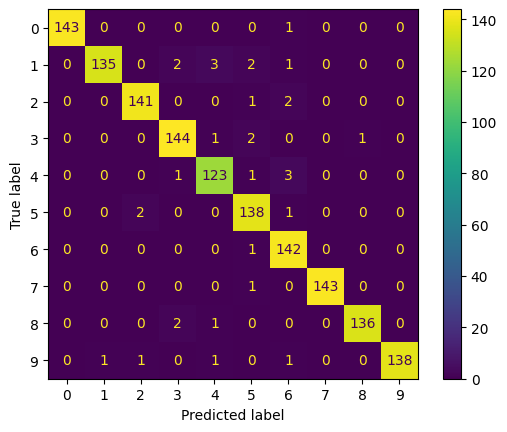

In [12]:
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes)}")
print(f"Classwise Classification Report: \n{classification_report(y_true, y_pred_classes)}")
con_matrix = confusion_matrix(np.ravel(y_true), y_pred_classes)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

<h1>Predicting test labels</h1>

In [13]:
pred = Efficient_model.predict(test_images)

123/123 [==============================] - 98s 755ms/step


In [14]:
pred = np.argmax(pred,axis=1)

In [15]:
test_df['label'] = pred

In [16]:
test_df

,id,path,pred_1,pred_2,pred_3,label,pred_4
0,0,imageset/test/0.JPEG,3,0,0,0,0
1,1,imageset/test/1.JPEG,0,0,0,0,0
2,2,imageset/test/2.JPEG,0,0,0,0,0
3,3,imageset/test/3.JPEG,0,0,0,0,0
4,4,imageset/test/4.JPEG,0,0,0,0,0
...,...,...,...,...,...,...,...
3920,3920,imageset/test/3920.JPEG,9,9,9,9,9
3921,3921,imageset/test/3921.JPEG,9,9,9,9,9
3922,3922,imageset/test/3922.JPEG,9,9,9,9,9
3923,3923,imageset/test/3923.JPEG,9,9,9,9,9


In [17]:
test_df.to_csv('test.csv',index=False)